<a href="https://colab.research.google.com/github/bleslav/Big-Data-class-2025/blob/main/API_i_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwagi przed zajęciami:
Rozmawiałem ostatnio z koleżanką, która pracuje jako Data Scientist. Poprosiłem o rady dla studentów, którzy też chcieliby w tym pracować:

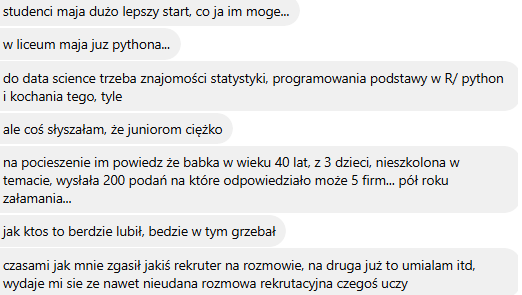

Co przypomina mi, że miałem Wam polecić newsletter od Crappy Data ([link](https://crappydata.pl/newsletter/)). Możecie zobaczyć jak Senior Data Scientist szuka obecnie pracy. I nie, nie jest przesłodko, mega łatwo i firmy się o nią zabijają.

Przy okazji- bardzo mi się podobał pomysł Kasi (autorki Crappy Data) żeby robić sobie notatki z rekrutacji. Jak aplikujemy to wypisać: dokąd, za ile, screenshot ogłoszenia o pracę, jak poszło na pierwszym/drugim/trzecim etapie, dlaczego tak poszło na pierwszym/drugim/trzecim etapie, wynik.

I na koniec artykuł z bloga, który nas dotyczy ["Nie zaczynaj od Pythona"](https://crappydata.pl/2024/04/nie-zaczynaj-od-pythona/) ;)

# Intro

Franek jest studentem trzeciego roku kognitywistyki, który ma do wykonania semestralny projekt zaliczeniowy. Zadanie polega na analizie danych kognitywnych z wykorzystaniem Cognitive Atlas API. Termin oddania pracy to jutro, a Franek - jak to Franek - oczywiście zabrał się za projekt wieczorem przed ostatecznym terminem.

Profesor wymaga nie tylko pobrania danych z API, ale również ich czyszczenia, transformacji i analizy - klasycznego procesu ETL (Extract, Transform, Load). Na szczęście Franek zna podstawy Pythona i wie, że Google Colab może uratować sytuację.

# Pytania na rozruszanie

1.   Kto kiedykolwiek zostawił projekt na ostatnią chwilę?
2.   Czy ktoś już pracował z jakimkolwiek API?
3.   Jakie wyzwania możemy napotkać podczas pracy z danymi?

# API

API - interfejs programistyczny aplikacji, który pozwala różnym systemom na komunikację.

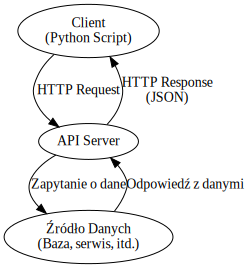

In [9]:
# Jeśli nie masz zainstalowanej biblioteki graphviz w Google Colab, odkomentuj poniższą linię:
# !pip install graphviz

from graphviz import Digraph

# Inicjalizacja diagramu
dot = Digraph(comment='Przepływ Danych w Pracy z API')

# Dodanie węzłów
dot.node('A', 'Client\n(Python Script)')
dot.node('B', 'API Server')
dot.node('C', 'Źródło Danych\n(Baza, serwis, itd.)')

# Dodanie krawędzi (strzałek) ilustrujących przepływ informacji
dot.edge('A', 'B', label='HTTP Request')
dot.edge('B', 'C', label='Zapytanie o dane')
dot.edge('C', 'B', label='Odpowiedź z danymi')
dot.edge('B', 'A', label='HTTP Response\n(JSON)')

# Wyświetlenie diagramu w notatniku (Colab)
dot.render('api_workflow', format='png', view=True)
dot  # Wyświetlenie grafu w notatniku

## ​JSON (JavaScript Object Notation)
Lekki format wymiany danych, który jest łatwy do odczytu zarówno przez ludzi, jak i maszyny. Jest on oparty na podzbiorze języka JavaScript, ale jego zastosowanie jest niezależne od konkretnego języka programowania. JSON wykorzystuje strukturę par klucz-wartość oraz list, co pozwala na przechowywanie złożonych danych w sposób uporządkowany.



```
{
  "imie": "Jan",
  "nazwisko": "Kowalski",
  "wiek": 30,
  "zainteresowania": ["programowanie", "podróże", "fotografia"]
}
```



## CSV (Comma-Separated Values)
Format pliku tekstowego służący do przechowywania danych tabelarycznych. W pliku CSV każda linia reprezentuje jeden wiersz tabeli, a wartości w kolumnach są oddzielone przecinkami lub innymi separatorami, takimi jak średniki. Format ten jest powszechnie stosowany do wymiany danych między różnymi aplikacjami, zwłaszcza arkuszami kalkulacyjnymi i bazami danych.



```
imie,nazwisko,wiek
Jan,Kowalski,30
Anna,Nowak,25
```



## Wprowadzenie do API
Franek zaczyna od zrozumienia, czym jest API - interfejs programistyczny aplikacji, który pozwala różnym systemom na komunikację.

In [10]:
# Franek zaczyna od importowania potrzebnych bibliotek
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

# Sprawdza dokumentację Cognitive Atlas API
print("Dostępne endpointy Cognitive Atlas API:")
print("- /api/concept - informacje o konceptach poznawczych")
print("- /api/task - informacje o zadaniach poznawczych")
print("- /api/disorder - informacje o zaburzeniach")
print("- /api/search - wyszukiwanie w bazie")

# Tworzy funkcję pomocniczą do pobierania danych z API
def get_data_from_api(endpoint):
    base_url = "http://www.cognitiveatlas.org/api"
    url = f"{base_url}/{endpoint}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Błąd {response.status_code}: Nie udało się pobrać danych")
        return None

Dostępne endpointy Cognitive Atlas API:
- /api/concept - informacje o konceptach poznawczych
- /api/task - informacje o zadaniach poznawczych
- /api/disorder - informacje o zaburzeniach
- /api/search - wyszukiwanie w bazie


Franek testuje API, próbując pobrać jeden koncept poznawczy:

In [11]:
# Próba pobrania danych o konceptach
concepts = get_data_from_api("concept")

# Sprawdzenie, czy dane zostały pobrane poprawnie
if concepts:
    print(f"Pobrano {len(concepts)} konceptów")
    print("\nPrzykładowy koncept:")
    print(json.dumps(concepts[0], indent=2))
else:
    print("Nie udało się pobrać danych o konceptach")

Pobrano 915 konceptów

Przykładowy koncept:
{
  "id_concept_class": "ctp_C3",
  "creation_time": 1512660626063,
  "event_stamp": "2009-06-22T19:12:54",
  "def_id_user": "usr_4e42a3196fbcd",
  "def_event_stamp": "2011-08-10T20:41:26",
  "last_updated": 1512660626063,
  "def_id": "def_4e42ecf5ef5a9",
  "name": "abductive reasoning",
  "alias": "",
  "definition_text": "The process of adopting an explanatory hypothesis; inferring the cause A as a possible explanation for the consequence B.",
  "id_user": "usr_0000000000",
  "id": "trm_4a3fd79d096be"
}


## Zadanie 1
Zmodyfikuj kod aby Franka pobrać dane o zadaniach poznawczych (tasks) zamiast konceptów i wyświetlić kilka przykładowych rezultatów.

## Pobieranie danych z Cognitive Atlas API
Franek chce teraz dokładniej zbadać Cognitive Atlas API ([link](https://www.cognitiveatlas.org/)) i pobrać różne typy danych:

In [12]:
# Franek potrzebuje znaleźć koncepty związane z pamięcią
def search_concepts(query):
    search_data = get_data_from_api(f"search?q={query}")
    return search_data

# Wyszukiwanie konceptów związanych z pamięcią
memory_concepts = search_concepts("memory")

# Wyświetlenie wyników
if memory_concepts:
    print(f"Znaleziono {len(memory_concepts)} konceptów związanych z pamięcią")

    # Wyświetlenie pierwszych 3 wyników
    for i, concept in enumerate(memory_concepts[:3]):
        print(f"\nWynik {i+1}:")
        print(f"Nazwa: {concept['name']}")
        print(f"Definicja: {concept.get('definition', 'Brak definicji')}")

Znaleziono 216 konceptów związanych z pamięcią

Wynik 1:
Nazwa: auditory memory
Definicja: Brak definicji

Wynik 2:
Nazwa: auditory working memory
Definicja: Brak definicji

Wynik 3:
Nazwa: autobiographical memory
Definicja: Brak definicji


Następnie Franek pobiera szczegółowe informacje o konkretnym koncepcie:

In [15]:
def get_concept_details(concept_id):
    return get_data_from_api(f"v-alpha/concept?id={concept_id}")


working_memory_id = "trm_4a3fd79d0b5a7"
working_memory = get_concept_details(working_memory_id)

if working_memory:
    print("\nSzczegóły o pamięci roboczej:")
    # Access the concept details directly from the working_memory dictionary
    print(f"Nazwa: {working_memory['name']}")
    print(f"Definicja: {working_memory.get('definition_text', 'Brak definicji')}")
    print(f"Powiązane koncepty: {len(working_memory.get('relationships', []))}")


Szczegóły o pamięci roboczej:
Nazwa: working memory
Definicja: active maintenance and flexible updating of goal/task relevant information (items, goals, strategies, etc.) in a form that resists interference but has limited capacity. These representations may involve flexible binding of representations, may be characterized by the absence of external support for the internally maintained representations, and are frequently temporary due to ongoing interference

Powiązane koncepty: 24


## Zadanie 2

1. Wyszukaj koncepty związane z uwagą (attention)

2. Pobierz szczegółowe dane o wybranym koncepcie

3. Zmodyfikuj kod, aby zapisać wyniki wyszukiwania do pliku JSON

# ETL/ELT (Extract Transform Load / Extract Load Transform)

Franek przystępuje do przetwarzania pobranych danych:

In [22]:
# Utwórzmy DataFrame dla konceptów
concepts = get_data_from_api("concept")
concepts_df = pd.DataFrame(concepts)

# Podstawowe informacje o danych
print("Informacje o DataFrame z konceptami:")
print(concepts_df.info())

# Sprawdzenie pierwszych rekordów
print("\nPierwsze 5 konceptów:")
print(concepts_df[['id', 'name', 'def_id']].head())

# Sprawdzenie brakujących wartości
print("\nLiczba brakujących wartości w każdej kolumnie:")
print(concepts_df.isnull().sum())

# Filtrowanie danych - koncepty zawierające słowo "memory"
memory_concepts_df = concepts_df[concepts_df['name'].str.contains('memory', case=False, na=False)]
print(f"\nZnaleziono {len(memory_concepts_df)} konceptów zawierających 'memory' w nazwie:")
print(memory_concepts_df[['id', 'name']].head())

# Uzupełnianie brakujących definicji
concepts_df['def_id'] = concepts_df['def_id'].fillna('Brak definicji')

Informacje o DataFrame z konceptami:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_concept_class  812 non-null    object
 1   creation_time     915 non-null    int64 
 2   event_stamp       815 non-null    object
 3   def_id_user       812 non-null    object
 4   def_event_stamp   812 non-null    object
 5   last_updated      915 non-null    int64 
 6   def_id            812 non-null    object
 7   name              915 non-null    object
 8   alias             815 non-null    object
 9   definition_text   915 non-null    object
 10  id_user           815 non-null    object
 11  id                915 non-null    object
dtypes: int64(2), object(10)
memory usage: 85.9+ KB
None

Pierwsze 5 konceptów:
                  id                 name             def_id
0  trm_4a3fd79d096be  abductive reasoning  def_4e42ecf5ef5a9
1  trm_4a3fd

## Zadanie 3
1. Stwórz DataFrame z danymi o zadaniach (tasks)

2. Sprawdź, ile zadań zawiera słowo "attention" w nazwie

3. Zidentyfikuj i poradź sobie z brakującymi wartościami w kolumnie 'definition'

## Do przemyślenia
Jakie są metody radzenia z brakującymi wartościami?

## Zaawansowany ETL
Franek chce połączyć dane z różnych źródeł, aby uzyskać bardziej kompletny obraz:

Przykładowe powiązania między zadaniami i konceptami:
             task_id                                          task_name  \
0  trm_4c8990b07a037                     music comprehension/production   
1  trm_5887c029d46f4  Gustatory stimulation with liquid tastes or fl...   
2  trm_4da88ae0f2952                  Rey Auditory Verbal Learning Task   
3  trm_5873ce8e77d1d               spatial localizer fMRI task paradigm   
4  trm_4fbd2d71adf87                        minimal feature match task    

          concept_id                  concept_name  
0  trm_4a3fd79d09919            attentional effort  
1  trm_557b476527a27  auditory tone discrimination  
2  trm_4a3fd79d09e58                     constancy  
3  trm_4a3fd79d0b29c                      strategy  
4  trm_4a3fd79d09930             attentional state  

Najczęstsze koncepty w powiązaniach:
concept_name
conceptual skill                2
paraphasia                      2
constancy                       1
attentional effort      

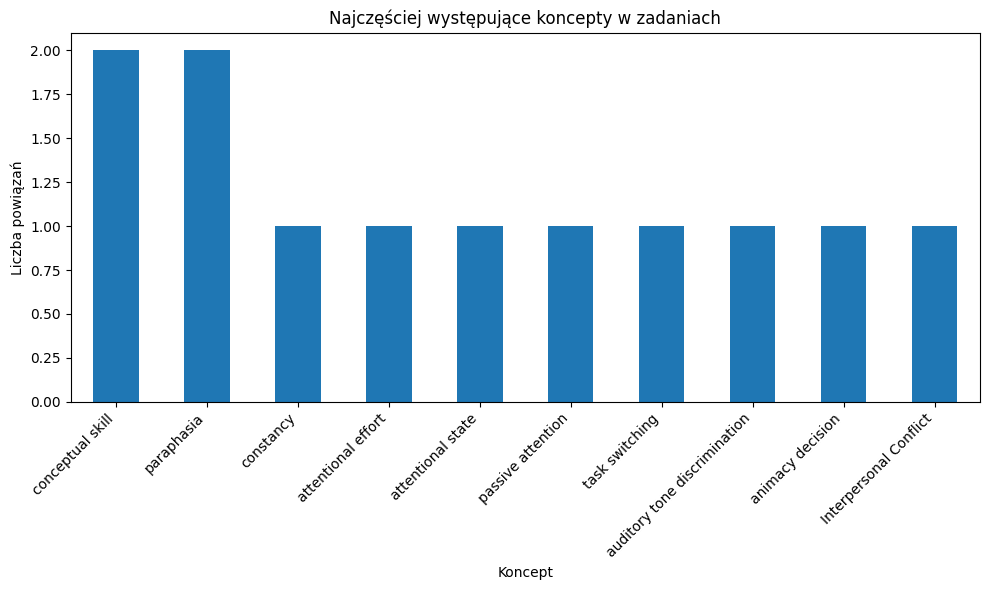

In [23]:
# Pobieranie danych o zadaniach i tworzenie DataFrame
tasks = get_data_from_api("task")
tasks_df = pd.DataFrame(tasks)

# Pobieranie danych o zaburzeniach
disorders = get_data_from_api("disorder")
disorders_df = pd.DataFrame(disorders)

# Franek chce połączyć dane o zadaniach i konceptach
# Załóżmy, że API zwraca powiązania między konceptami i zadaniami
# (W rzeczywistości musiałby napisać dodatkowe zapytania do API)
# Na potrzeby przykładu tworzymy sztuczne powiązania

import numpy as np

# Ustawienie ziarna dla powtarzalności wyników
np.random.seed(42)

# Tworzenie sztucznych powiązań między konceptami i zadaniami
relations_data = []
for _ in range(50):
    task = tasks_df.sample(1).iloc[0]
    concept = concepts_df.sample(1).iloc[0]
    relations_data.append({
        'task_id': task['id'],
        'task_name': task['name'],
        'concept_id': concept['id'],
        'concept_name': concept['name']
    })

relations_df = pd.DataFrame(relations_data)
print("Przykładowe powiązania między zadaniami i konceptami:")
print(relations_df.head())

# Analiza powiązań - które koncepty są najczęściej powiązane z zadaniami
concept_counts = relations_df['concept_name'].value_counts()
print("\nNajczęstsze koncepty w powiązaniach:")
print(concept_counts.head(10))

# Wizualizacja najczęstszych konceptów
plt.figure(figsize=(10, 6))
concept_counts.head(10).plot(kind='bar')
plt.title('Najczęściej występujące koncepty w zadaniach')
plt.xlabel('Koncept')
plt.ylabel('Liczba powiązań')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Zadanie 4
1. Stwórz powiązania między zaburzeniami (disorders) a konceptami

2. Przeanalizuj, które koncepty są najczęściej powiązane z konkretnymi zaburzeniami

3. Stwórz wizualizację pokazującą te powiązania

4. Zapisz wyniki do pliku CSV

# Uwagi na koniec

Chciałbym zwrócić Państwa uwagę na fakt, że przedstawione tematy stanowią baaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaardzo uproszczoną wersję tematów. Niestety, będzie to motyw przewodni naszych zajęć.

Proponowane rozwinięcie treści (czytać, Googlować/pytać ChatGPT o wszystko [WSZYSTKO] czego nie rozumiemy, próbować robić samemu albo przynajmniej modyfikować kod źródłowy):

API:
*   koniecznie doczytać o security keys i tokenach!
* poczytać o Postman API
* https://realpython.com/api-integration-in-python/
*   https://medium.com/@mine.gazioglu40/download-any-dataset-from-kaggle-with-kaggle-api-and-python-9ab84165aea0

ETL:
* tutaj ciężko wskazać wartościowe źródło. Wszystko zdaje się jechać mocnymi ogólnikami
* ta książka wygląda w porządku:
Building ETL Pipelines with Python: Create and deploy enterprise-ready ETL pipelines by employing modern methods (zwłaszcza darmowy kod do niej tutaj: https://github.com/joseferbt/ETL_Pipelines_python/tree/main)
* https://www.kaggle.com/code/nilaychauhan/etl-pipelines-tutorial-world-bank-datasets

Dodatkowo w temacie pobierania danych warto się zainteresować scrappingiem stron internetowych (i jak robić to legalnie żeby nie wpakować się w kłopoty):
https://www.youtube.com/playlist?list=PLUaB-1hjhk8G-xVXA5FxT2cLNzd87GInr
